## **Ex.1 - Loading the dataset**

In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

Splitting the data into 70% training and 30% test subsets.

In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

Standardizing the data.

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## **Ex.2 - Principal component analysis in scikit-learn**

### Part 1 - *Perform PCA and present the explained variance ratio* (check https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Perform the transformation on test data and plot the first two principal components.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Perform PCA using scikit-learn
# Initialize PCA. Let's not specify the number of components so we can see the explained variance for all components
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# 2. Present the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)
print("\nCumulative Explained Variance:", np.cumsum(explained_variance))


Explained Variance Ratios: [0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]

Cumulative Explained Variance: [0.36951469 0.55386396 0.67201555 0.74535807 0.80957914 0.86009639
 0.89964293 0.92608211 0.9499753  0.96627144 0.98007165 0.99179391
 1.        ]


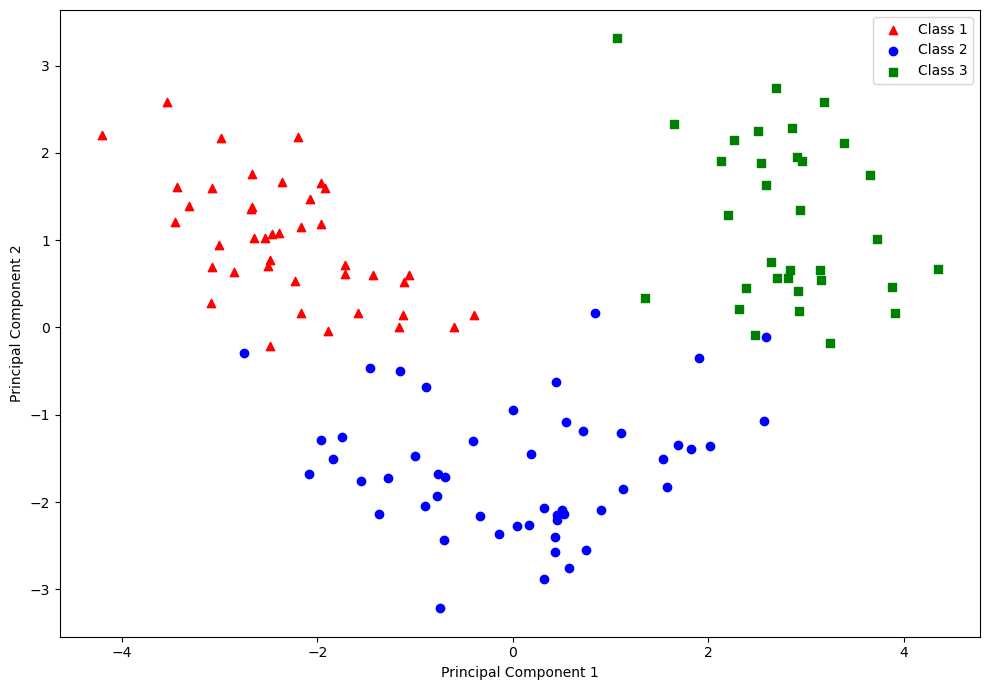

In [6]:
# 3. Transform the test data using the PCA
X_test_pca = pca.transform(X_test_std)

# 4. Plot the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='red', marker='^', label='Class 1')
plt.scatter(X_train_pca[y_train == 2, 0], X_train_pca[y_train == 2, 1], color='blue', marker='o', label='Class 2')
plt.scatter(X_train_pca[y_train == 3, 0], X_train_pca[y_train == 3, 1], color='green', marker='s', label='Class 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Part 2 - *Training logistic regression classifier using the first 2 principal components*. Using a cross-validation procedure (check https://scikit-learn.org/stable/modules/cross_validation.html), select the best C parameter for the logistic regression with the first two principal components. Repeat the same procedure for the dataset with all the original features. Compare the results in terms of accuracy and confusion matrix. Present the conclusions.

In [9]:
# 1. Perform PCA using scikit-learn
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [13]:
# 2. Find the best C parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg = LogisticRegression(max_iter=10000)

# Using only the two main components:
grid_pca = GridSearchCV(logreg, param_grid, cv=10)
grid_pca.fit(X_train_pca, y_train)

print("Best C for PCA:", grid_pca.best_params_)

# Using all the original features:
grid_all = GridSearchCV(logreg, param_grid, cv=10)
grid_all.fit(X_train_std, y_train)

print("Best C for all resources:", grid_all.best_params_)

Best C for PCA: {'C': 1}
Best C for all resources: {'C': 0.1}


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

# PCA
y_pred_pca = grid_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
confusion_pca = confusion_matrix(y_test, y_pred_pca)

# All resources
y_pred_all = grid_all.predict(X_test_std)
accuracy_all = accuracy_score(y_test, y_pred_all)
confusion_all = confusion_matrix(y_test, y_pred_all)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_pca = confusion_matrix(y_test, y_pred_pca)

def plot_confusion_matrix(confusion, title='Matriz de Confusão'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()


PCA Accuracy: 0.9259259259259259


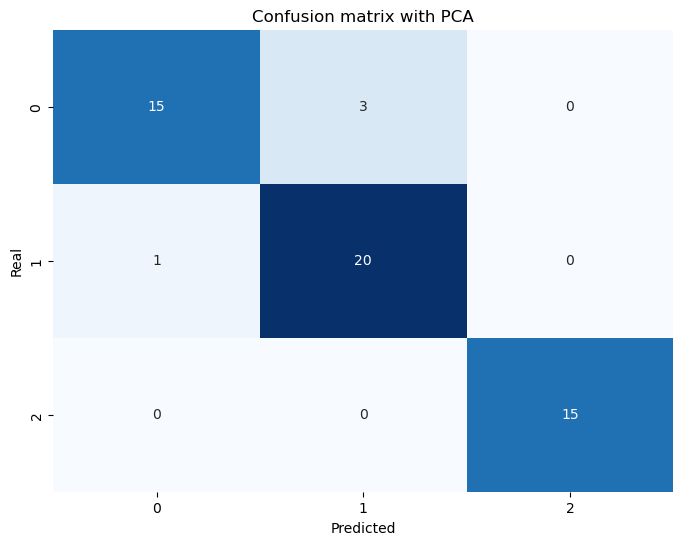


All resources Accuracy: 1.0


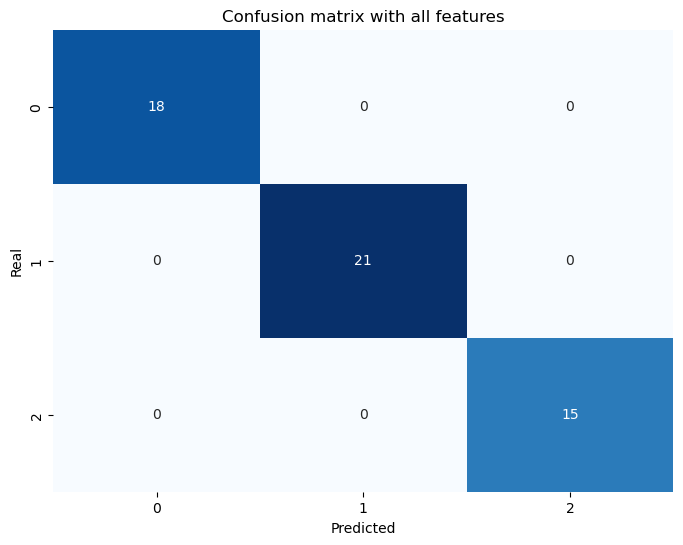

In [23]:
print("PCA Accuracy:", accuracy_pca)
plot_confusion_matrix(confusion_pca, title='Confusion matrix with PCA')

print("\nAll resources Accuracy:", accuracy_all)
plot_confusion_matrix(confusion_all, title='Confusion matrix with all features')

**Felipe's Note:** Based on the provided confusion matrices and accuracy scores for the two models, observations can be made. The model trained using the first two principal components (PCA) achieved an accuracy of 92.6%. The confusion matrix for the PCA model indicates some misclassifications, particularly in the first class. This suggests that while the first two principal components captured a significant amount of the variance in the data, they might not have captured all the nuances necessary for perfect classification.

On the other hand, the model trained using all original features achieved a perfect accuracy of 100%, with the confusion matrix showing perfect classification across all three classes. This superior performance suggests that the original features contain valuable information that contributes to the classification accuracy, which might not be entirely captured by the first two principal components from PCA. 

In practice, while PCA can help in reducing dimensionality and computational costs, it's essential to ensure that the reduced feature set retains the critical information necessary for the task at hand. In this case, using all original features provided the best classification results.